**SET-1: Descriptive + Statistics + Probability**

	Q1) Look at the data given below. Plot the data, find the outliers and find out  μ,σ,σ^2

Name of company	Measure X
Allied Signal	24.23%
Bankers Trust	25.53%
General Mills	25.41%
ITT Industries	24.14%
J.P.Morgan & Co.	29.62%
Lehman Brothers	28.25%
Marriott	25.81%
MCI	24.39%
Merrill Lynch	40.26%
Microsoft	32.95%
Morgan Stanley	91.36%
Sun Microsystems	25.99%
Travelers	39.42%
US Airways	26.71%
Warner-Lambert	35.00%


In [ ]:
from scipy import stats
import numpy as np
import statistics as st
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
comp=pd.DataFrame({'Company':['Allied Signal',
'Bankers Trust',
'General Mills',
'ITT Industries',
'J.P.Morgan & Co',
'Lehman Brothers',
'Marriott',
'MCI',
'Merrill Lynch',
'Microsoft',
'Morgan Stanley',
'Sun Microsystems',
'Travelers',
'US Airways',
'Warner-Lambert'],'Measurex':[24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00]})
comp

,Company,Measurex
0,Allied Signal,24.23
1,Bankers Trust,25.53
2,General Mills,25.41
3,ITT Industries,24.14
4,J.P.Morgan & Co,29.62
5,Lehman Brothers,28.25
6,Marriott,25.81
7,MCI,24.39
8,Merrill Lynch,40.26
9,Microsoft,32.95


In [ ]:
Mean = comp['Measurex'].mean()
Variance = comp['Measurex'].var()
StDev = comp['Measurex'].std()
print("The Mean is: " , Mean , "The Variance is: " , Variance , "The standard Deviation is: " , StDev)

The Mean is:  33.27133333333333 The Variance is:  287.1466123809524 The standard Deviation is:  16.945400921222028


{'whiskers': [<matplotlib.lines.Line2D at 0x7f11a65bf100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f11a65bf640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f11a65bee60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f11a65bfb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f11a65bfe20>],
 'means': []}

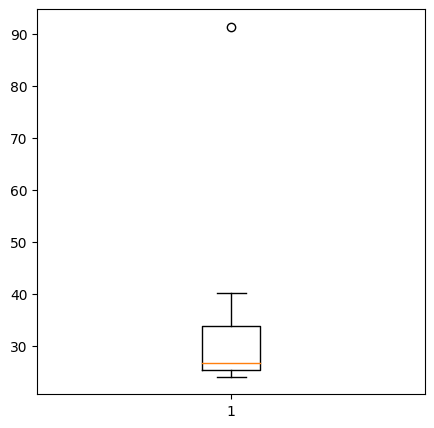

In [ ]:
#Plot the graph
plt.figure(figsize=(5,5))
plt.boxplot(comp['Measurex'])

In [ ]:
#To find the outliers
Q1 = np.quantile(comp["Measurex"],0.25)
Q3 = np.quantile(comp["Measurex"],0.75)
Interquartile = Q3 - Q1
print('Interquartile is :', Interquartile)
lowerlimit = Q1 - 1.5*Interquartile
print('LowerLimit is :', lowerlimit)
Upperlimit = Q3 + 1.5*Interquartile
print('UpperLimit is :', Upperlimit)

Interquartile is : 8.505000000000003
LowerLimit is : 12.712499999999995
UpperLimit is : 46.7325


**SET-2: Normal Distribution and Functions of Random Variables**

5.	Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 32) and Profit2 ~ N(7, 42) respectively. Both the profits are in $ Million. Answer the following questions about the total profit of the company in Rupees. Assume that $1 = Rs. 45
A.	Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
B.	Specify the 5th percentile of profit (in Rupees) for the company
C.	Which of the two divisions has a larger probability of making a loss in a given year?


In [ ]:
#A.Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
mean1=5*45
print("Mean of divison1 in $:",mean1,"Million")
std1=3
mean2=7*45
print("Mean of division2  in $:",mean2,"Million")
std2=4
#A Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company
mean_company=mean1+mean2
STD_company=np.sqrt(9+16)*45
rupee_range=stats.norm.interval(0.95,mean_company,STD_company)
print("The mean of the company in Million$ is:",mean_company)
print("The STD of the company in Million$ is:",STD_company)
print("Rupee range contains 95% probability for the annual profit of the company:",rupee_range,"in Million$")


Mean of divison1 in $: 225 Million
Mean of division2  in $: 315 Million
The mean of the company in Million$ is: 540
The STD of the company in Million$ is: 225.0
Rupee range contains 95% probability for the annual profit of the company: (99.00810347848784, 980.9918965215122) in Million$


In [ ]:
#B.Specify the 5th percentile of profit (in Rupees) for the company
from numpy.lib.function_base import percentile
# 5th percentile is obtained from z-table
z5=stats.norm.ppf(0.05)
z5
#5th percentile of profit is from Z=(X-Mean)/STD
X=(z5*STD_company)+mean_company
print("5th percentile of profit (in Rupees) for the company in Million$:",X)

5th percentile of profit (in Rupees) for the company in Million$: 169.9079339359186


In [ ]:
#C.Which of the two divisions has a larger probability of making a loss in a given year?
probability_loss_1=stats.norm.cdf(0,5,3)
probability_loss_2=stats.norm.cdf(0,7,4)
print("probability of making loss by division 1:",probability_loss_1)
print("probability of making loss by division 2:",probability_loss_2)
#Hence, the first division of company, thus have large probability of making  Loss in a given year.

probability of making loss by division 1: 0.0477903522728147
probability of making loss by division 2: 0.040059156863817086


**SET-3**

5. In January 2005, a company that monitors Internet traffic (WebSideStory) reported that its sampling revealed that the Mozilla Firefox browser launched in 2004 had grabbed a 4.6% share of the market.

I. If the sample were based on 2,000 users, could Microsoft conclude that Mozilla has a less than 5% share of the market?

In [1]:
#H0=>5%
#Ha<5%
import numpy as np
import scipy.stats as stats
p=0.05
q=1-p
alpha=0.05
phat=0.046
n=2000
#Here we uses one sample z test for proportions
z_score=(phat-p)/(np.sqrt(p*q/n))
print(z_score)
p_value=1-stats.norm.cdf(abs(z_score))#since H0=>5% so we need to do 1-probabiliy of <5%
print("p_value:",p_value)

-0.820782681668124
p_value: 0.20588503245107104


Questions 8 and 9 are based on the following: To prepare a report on the economy, analysts need to estimate the percentage of businesses that plan to hire additional employees in the next 60 days.

8.	How many randomly selected employers (minimum number) must we contact in order to guarantee a margin of error of no more than 4% (at 95% confidence)?

A.	600
B.	400
C.	550
D.	1000


In [5]:
#Error=z/((p*q)/sqrt(n))
#n=(Error)^2(p*q)/z
import math as mth
phat=0.5
q=0.5
CI=0.95
alpha=1-CI
z_value=stats.norm.ppf(alpha/2)
z_value
n=(((z_value)**2)*0.5*0.5/(0.04)**2)
round(n)

600

9.	Suppose we want the above margin of error to be based on a 98% confidence level. What sample size (minimum) must we now use?

A.	1000
B.	757
C.	848
D.	543


In [6]:
import math as mth
phat=0.5
q=0.5
CI2=0.98
alpha2=1-CI2
z_value2=stats.norm.ppf((alpha2)/2)
z_value2
n=(((z_value2)**2)*0.5*0.5/(0.04)**2)
round(n)

846

**SET-4: Sampling Distributions and Central Limit Theorem**

3. Auditors at a small community bank randomly sample 100 withdrawal transactions

made during the week at an ATM machine located near the bank’s main branch.

Over the past 2 years, the average withdrawal amount has been
40.

Since audit investigations are typically expensive, the auditors decide to not initiate further investigations

are typically expensive, the auditors decide to not initiate further investigations if

the mean transaction amount of the sample is between
55. What is the

probability that in any given week, there will be an investigation?

A. 1.25%

B. 2.5%

C. 10.55%

D. 21.1%

E. 50%

In [9]:
import numpy as np
import scipy.stats as stats
XAverage=50
STD_SAMPLE=40
n=100
s1=45
s2=55
df=n-1
alpha=0.05

t_value1=(s1 - XAverage)/((STD_SAMPLE)/np.sqrt(n))
t_value2=(s2 - XAverage)/((STD_SAMPLE)/np.sqrt(n))
print("t_value1:", t_value1)
print("t_value2:", t_value2)
probability1=stats.norm.cdf(t_value1)
probability2=stats.norm.cdf(t_value2)
print("probability1:",probability1)
print("probability2:",probability2)
p=probability2-probability1
print("probability between 45 & 55:",p)
if p<=alpha:
  print("Accept Alternate hypothesis,so There will be a chance of an investigation")
else:
  print("Reject Alternate hypothesis,so There will not be a chance of an investigation")

t_value1: -1.25
t_value2: 1.25
probability1: 0.10564977366685535
probability2: 0.8943502263331446
probability between 45 & 55: 0.7887004526662893
Reject Alternate hypothesis,so There will not be a chance of an investigation


4. The auditors from the above example would like to maintain the probability

of investigation to 5%. Which of the following represents the minimum number

transactions that they should sample if they do not want to change the

thresholds of 45 and 55? Assume that the sample statistics remain unchanged.

A. 144

B. 150

C. 196

D. 250

E. Not enough information

In [10]:
t_value=stats.t.ppf((1-0.05/2),99)
t_value
n=(40*1.96)**2/25
print(n)

245.86240000000006


5.	An educational startup that helps MBA aspirants write their essays is targeting individuals who have taken GMAT in 2012 and have expressed interest in applying to FT top 20 b-schools. There are 40000 such individuals with an average GMAT score of 720 and a standard deviation of 120. The scores are distributed between 650 and 790 with a very long and thin tail towards the higher end resulting in substantial skewness. Which of the following is likely to be true for randomly chosen samples of aspirants?

A.	The standard deviation of the scores within any sample will be 120.
B.	The standard deviation of the mean of across several samples will be 120.
C.	The mean score in any sample will be 720.
D.	The average of the mean across several samples will be 720.
E.	The standard deviation of the mean across several samples will be 0.60


In [11]:
X_avg=720
STD_samp=120
n=40000
#Standard_deviation_of_the_mean_across_several_samples is Standard_Error
Standard_Error=STD_samp/np.sqrt(n)
print(Standard_Error)

0.6
